# Digits recognitions

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(tf.__version__)

2.0.0


In [2]:
# 60000 of 28x28 px images of hand-written digits from 0 to 9
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


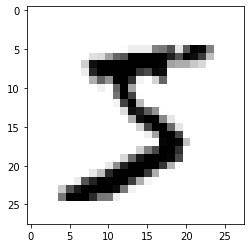

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [6]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [7]:
# with np.printoptions(precision=2, suppress=True):
#     print(x_train[0])

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.36,0.05,0.34,0.52,0.51,0.26,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.05,...,0.28,0.22,0.32,0.31,0.25,0.08,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.29,0.31,...,0.11,0.10,0.10,0.07,0.05,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.29,0.34,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.32,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


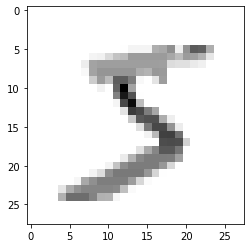

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - ETA: 0s - loss: 0.2627 - accuracy: 0.92 - ETA: 0s - loss: 0.2618 - accuracy: 0.92 - 6s 101us/sample - loss: 0.2601 - accuracy: 0.9215
Epoch 2/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1048 - accuracy: 0.9682
Epoch 3/3
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0730 - accuracy: 0.9770s - loss: - ETA: 0s - loss: 0.0735 - ac


In [21]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

In [13]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.09165512721119448
Validation accuracy:  0.9729


In [14]:
model_name = 'digit_recognition.model'
model.save(model_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit_recognition.model/assets


In [15]:
loaded_model = tf.keras.models.load_model(model_name)

In [16]:
predictions = loaded_model.predict([x_test])

In [17]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


In [18]:
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,1.606806e-07,1.516796e-06,5.710709e-06,4.489782e-05,3.261954e-08,1.640523e-08,1.045912e-10,9.999307e-01,8.380991e-08,1.668954e-05
1,3.277317e-05,1.986448e-05,9.996526e-01,1.164254e-04,1.399976e-09,1.598764e-07,1.687377e-05,3.605346e-06,1.576276e-04,3.884036e-10
2,2.152412e-09,9.996755e-01,4.023714e-05,4.331433e-07,1.828866e-06,7.307566e-06,8.251314e-07,2.654922e-04,8.426316e-06,8.354389e-08
3,9.998477e-01,3.386836e-08,1.006328e-04,2.321673e-06,9.284460e-08,1.986401e-06,8.286241e-06,6.593087e-06,1.904591e-06,3.034961e-05
4,2.504829e-08,2.421825e-08,1.572917e-07,2.331279e-10,9.999485e-01,4.402141e-09,1.882708e-08,1.396411e-05,3.656096e-08,3.734379e-05
...,...,...,...,...,...,...,...,...,...,...
9995,4.524499e-10,2.029599e-05,9.999256e-01,3.869225e-05,3.617381e-13,4.054992e-10,4.732064e-11,7.259030e-06,8.075521e-06,8.175416e-11
9996,1.720452e-09,1.216608e-07,2.672037e-06,9.996688e-01,4.926354e-12,8.547195e-05,2.181230e-11,4.480663e-09,3.137300e-06,2.398298e-04
9997,3.518871e-08,5.197192e-08,1.798820e-08,8.771672e-08,9.997709e-01,2.569575e-08,1.069194e-08,8.914744e-06,4.250209e-05,1.775612e-04
9998,4.280436e-08,1.489954e-09,1.523048e-10,1.283736e-05,5.225466e-09,9.999268e-01,2.474924e-07,8.836287e-11,5.998316e-05,5.820932e-08


In [19]:
print(np.argmax(predictions[0]))

7


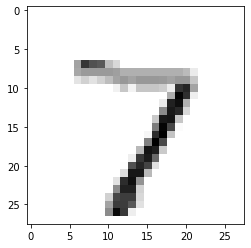

In [20]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()